<a href="https://colab.research.google.com/github/Shashank-Holla/TSAI-EVA4/blob/master/Session13_yolov3/yolov3_with_openCV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import necessary packages

In [0]:
import cv2
import numpy as np

import time
import sys
import os

In [0]:
from google.colab.patches import cv2_imshow

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
cd '/content/gdrive/My Drive/Colab Notebooks/SchoolOfAI/Session13_yolov3'

/content/gdrive/My Drive/Colab Notebooks/SchoolOfAI/Session13_yolov3


In [0]:
!ls

cfg  data  raw_image  results  weights	yolov3_with_openCV.ipynb


## Run Configurations

In [0]:
CONFIDENCE = 0.4
SCORE_THRESHOLD = 0.4
IOU_THRESHOLD = 0.4

#yolov3 architecture config
config_path = "cfg/yolov3.cfg"
#Yolo weights
weights_path = "weights/yolov3.weights"
#Image for object detection
image_path = "raw_image/shashank.jpg"
file_name = os.path.basename(image_path)
filename, ext = file_name.split(".")

## Load yolo v3 package

In [0]:
# Load yolo network
net = cv2.dnn.readNet(config_path, weights_path)

In [0]:
# Read class names from coco file.
classes = []
with open("data/coco.names","r") as fp:
    classes = [line.strip() for line in fp.readlines()]
colors = np.random.uniform(0, 255, size=(len(classes), 3))

In [0]:
#Get Output layers- ['yolo_82', 'yolo_94', 'yolo_106']
layer_names = net.getLayerNames()
output_layers = [layer_names[i[0] - 1] for i in net.getUnconnectedOutLayers()]

In [0]:
#Load image
img = cv2.imread(image_path)
img = cv2.resize(img, None, fx=0.2, fy=0.2)
height, width, channels = img.shape

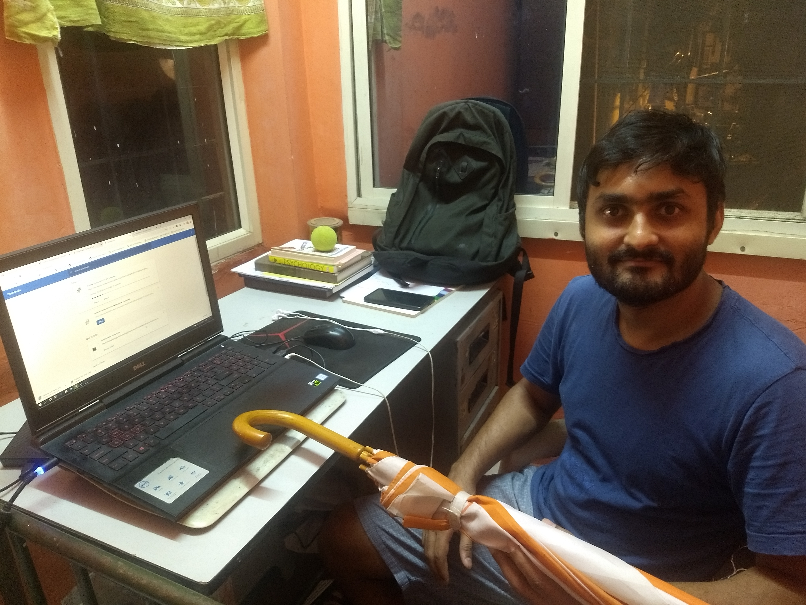

In [0]:
cv2_imshow(img)

## Prepare and run object detection

In [0]:
# 4d blob image
blob = cv2.dnn.blobFromImage(img, 1/255.0, (416, 416), (0, 0, 0), True, crop=False)

In [0]:
# Feed blob as input to the network
net.setInput(blob)
# Detecting objects
start = time.perf_counter()
outs = net.forward(output_layers)
time_took = time.perf_counter() - start
print(f"Time took: {time_took:.2f}s")

Time took: 2.09s


In [0]:
# Showing informations on the screen
# length of outs = 3 : For detection at all 3 scales (13 X 13 , 26 X 26, 52 X 52)
# length of outs[0],[1],[2] = detection at each scale for 3 bounding boxes : 169(13*13 * 3bb), 2028 (26*26 * 3bb), 8112 (52*52 * 3bb) 
# length of outs[0][0] = 85 : detection at each cell of a particular scale. (4 co-ordinates + objectness + score for each of the 80 classes)
class_ids = []
confidences = []
boxes = []
for out in outs: # Iterating over scales
    for detection in out:
        scores = detection[5:]
        class_id = np.argmax(scores) # Identify the class which has highest score
        confidence = scores[class_id]
        if confidence > CONFIDENCE:
            # Object detected
            center_x = int(detection[0] * width) # detection 0 is the x co-ordinate of the center of the bounding box. Then unnormalize.
            center_y = int(detection[1] * height) # detection 1 is the y co-ordinate of the center of the bounding box. Then unnormalize.
            w = int(detection[2] * width)
            h = int(detection[3] * height)
            # Rectangle coordinates
            x = int(center_x - w / 2)
            y = int(center_y - h / 2)
            boxes.append([x, y, w, h])
            confidences.append(float(confidence))
            class_ids.append(class_id)
        

In [0]:
# Non maximum suppression
indexes = cv2.dnn.NMSBoxes(boxes, confidences, SCORE_THRESHOLD, IOU_THRESHOLD)

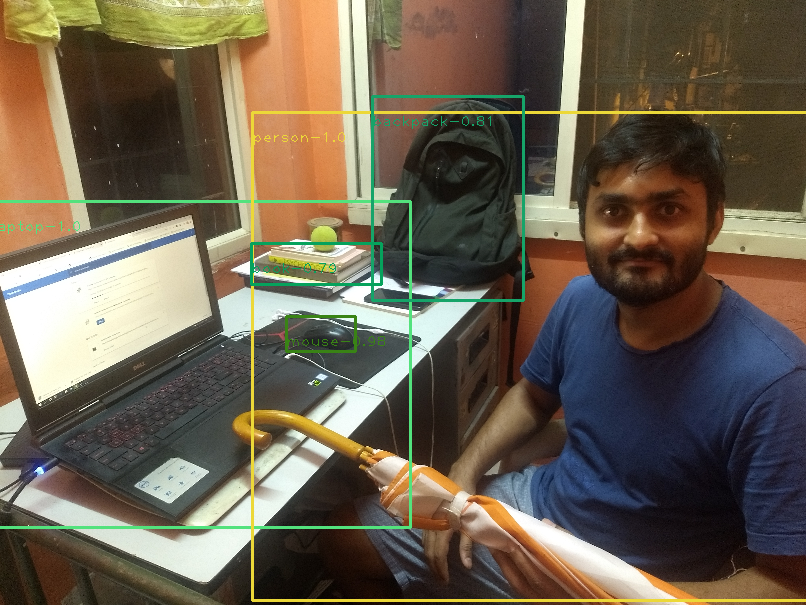

In [0]:
font_scale = 1
thickness = 1
font = cv2.FONT_HERSHEY_PLAIN
for i in range(len(boxes)):
    if i in indexes:
        x, y, w, h = boxes[i]
        label = str(classes[class_ids[i]])+"-"+str(round(confidences[i],2))
        color = colors[i]
        cv2.rectangle(img, (x, y), (x + w, y + h), color, 2)
        cv2.putText(img, label, (x, y + 30), font, fontScale=font_scale, color=color, thickness=thickness)
cv2_imshow(img)

In [0]:
cv2.imwrite("results/"+ filename + "2_yolo3." + ext, img)

True